creating dummy dataset

In [186]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(100)
x_train = 5*np.random.rand(100,1)
y_train = 2*x_train + 3 + 2 * np.random.rand(100,1)

scatter plot of x_train y_train

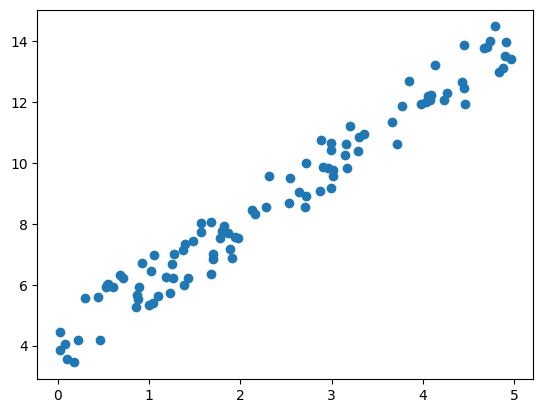

In [187]:
plt.scatter(x_train,y_train)
plt.show()

prediction function

In [188]:
def predict(w,b,x_train):

    y_pred = w * x_train + b
    return y_pred



cost function

In [189]:
def cost(w,b,x_train,y_train):
    sq_error = (y_train - predict(w,b,x_train))**2
    mse = np.mean(sq_error)
    return mse
    

updating parameters - w

In [190]:
def update_w(w,b,learning_rate,x_train,y_train):
    term = -2 * x_train * (y_train - predict(w,b,x_train))
    djdw = np.mean(term)
    w = w - learning_rate * djdw
    return w
    

updating parameters - b

In [191]:
def update_b(w,b,learning_rate,x_train,y_train):
    term = -2 * (y_train - predict(w,b,x_train))
    djdb = np.mean(term)
    b = b - learning_rate * djdb
    return b
    

Training process

In [192]:
def  train(x_train,y_train,verbose = True):

    w = 0
    b = 0
    learning_rate = 0.1

    weights= []
    biases= []
    costs= []
    i = 0

    weights.append(w)
    biases.append(b)
    c = cost(w,b,x_train,y_train)
    costs.append(c)

    while True:
        w = update_w(w,b,learning_rate,x_train,y_train)
        b = update_b(w,b,learning_rate,x_train,y_train)
        y_pred = predict(w,b,x_train)
        c = cost(w,b,x_train,y_train)
        
        if abs(c-costs[-1]) < 10**(-13):
            break

        weights.append(w)
        biases.append(b)
        costs.append(c)
        i+=1
            

        if (verbose==True) and (i%100==0):
            print(f"After {i} iterations, w = {w}, b = {b}, MSE = {c}")
        
    print(f"After final {i} iterations, the weight is {w}, the bias is {b}, and the MSE is {c}") 
    return w,b

    
    

w,b = train(x_train,y_train,verbose = True)



        



    


                

After 100 iterations, w = 1.9826943340403, b = 4.076257584827702, MSE = 0.3291589145227235
After 200 iterations, w = 1.9787167110932151, b = 4.08868939886926, MSE = 0.3291163754188519
After final 250 iterations, the weight is 1.9787066108880536, the bias is 4.088720966434617, and the MSE is 0.32911637511813574


Visualization of model prediction

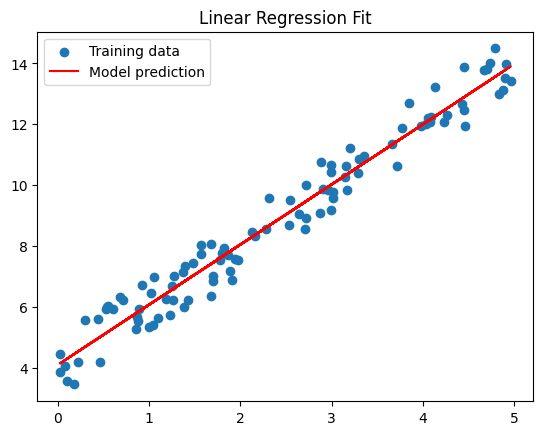

In [193]:
y_pred = predict(w, b, x_train)
plt.scatter(x_train, y_train, label="Training data")
plt.plot(x_train, y_pred, color='red', label="Model prediction")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()
